# Residual Decision Tree Surrogate Explainer Demo

This example demonstrates how to interpret a **Scikit-learn** model using the H2O Sonar library and plot **residual surrogate decision tree**.

In [1]:
import logging

import daimojo
import webbrowser

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons, explainers
from h2o_sonar.explainers.residual_dt_surrogate_explainer import ResidualDecisionTreeSurrogateExplainer
from h2o_sonar.lib.api.models import ModelApi

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
results_location = "../../results"

# dataset
dataset_path = "../../data/creditcard.csv"
target_col = "default payment next month"

In [3]:
# parameters
interpret.describe_explainer(ResidualDecisionTreeSurrogateExplainer)

{'id': 'h2o_sonar.explainers.residual_dt_surrogate_explainer.ResidualDecisionTreeSurrogateExplainer',
 'name': 'ResidualDecisionTreeSurrogateExplainer',
 'display_name': 'Residual Surrogate Decision Tree',
 'description': 'The residual surrogate decision tree predicts which paths in the tree (paths explain approximate model behavior) lead to highest or lowest error. The residual surrogate decision tree is created by training a simple decision tree on the residuals of the predictions of the model. Residuals are differences between observed and predicted values which can be used as targets in surrogate models for the purpose of model debugging. The method used to calculate residuals varies depending on the type of problem. For classification problems, logloss residuals are calculated for a specified class (only one residual surrogate decision is created by the explainer and it is built for this class). For regression problems, residuals are determined by calculating the square of the dif

## Interpret

In [4]:
# Driverless AI MOJO model
mojo_path = "../../data/models/creditcard-binomial.mojo"
mojo_model = daimojo.model(mojo_path)

# explainable model
model = ModelApi().create_model(
    model_src=mojo_model,
    target_col=target_col,
    used_features=list(mojo_model.feature_names),
)

In [5]:
interpretation = interpret.run_interpretation(
    dataset=dataset_path,
    model=model,
    target_col=target_col,
    results_location=results_location,
    log_level=logging.INFO,
    explainers=[
        commons.ExplainerToRun(
            explainer_id=ResidualDecisionTreeSurrogateExplainer.explainer_id(),
            params="",
        )
    ]
)

Checking whether there is an H2O instance running at http://localhost:43955 .

/home/srasaratnam/projects/h2o-sonar/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


.... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /home/srasaratnam/projects/h2o-sonar/venv/lib/python3.8/site-packages/hmli/backend/bin/hmli.jar
  Ice root: /tmp/tmpkqwrx7no
  JVM stdout: /tmp/tmpkqwrx7no/hmli_srasaratnam_started_from_python.out
  JVM stderr: /tmp/tmpkqwrx7no/hmli_srasaratnam_started_from_python.err
  Server is running at http://127.0.0.1:43955
Connecting to H2O server at http://127.0.0.1:43955 ... successful.


--------------------------  ----------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/Toronto
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    1 year, 2 months and 19 days !!!
H2O_cluster_name:           H2O_from_python_srasaratnam_blw1ks
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:43955
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         XGBoost, Algos, MLI, MLI-Driver, Core V3, Core V4, TargetEncoder
Python_version:             3.8.10 final
--------------------------  ----------------------------------------------------------------

2023-03-12 23:47:12,602 - h2o_sonar.explainers.residual_dt_surrogate_explainer.ResidualDecisionTreeSurrogateExplainerLogger - INFO - Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776: connecting to H2O-3 server: localhost:43955


Connecting to H2O server at http://localhost:43955 ... successful.


--------------------------  ----------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/Toronto
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    1 year, 2 months and 19 days !!!
H2O_cluster_name:           H2O_from_python_srasaratnam_blw1ks
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:43955
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         XGBoost, Algos, MLI, MLI-Driver, Core V3, Core V4, TargetEncoder
Python_version:             3.8.10 final
--------------------------  ----------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |

2023-03-12 23:47:14,752 - h2o_sonar.explainers.residual_dt_surrogate_explainer.ResidualDecisionTreeSurrogateExplainerLogger - INFO - Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776: DONE calculation


██████████████████████████████████████████████████████████| (done) 100%
H2O session _sid_b58f closed.


## Interact with the Explainer Result

In [6]:
# retrieve the result
result = interpretation.get_explainer_result(ResidualDecisionTreeSurrogateExplainer.explainer_id())

# result.data() method is not supported in this explainer

In [7]:
# open interpretation HTML report in web browser
webbrowser.open(interpretation.result.get_html_report_location())

True

In [8]:
# summary
result.summary()

{'id': 'h2o_sonar.explainers.residual_dt_surrogate_explainer.ResidualDecisionTreeSurrogateExplainer',
 'name': 'ResidualDecisionTreeSurrogateExplainer',
 'display_name': 'Residual Surrogate Decision Tree',
 'description': 'The residual surrogate decision tree predicts which paths in the tree (paths explain approximate model behavior) lead to highest or lowest error. The residual surrogate decision tree is created by training a simple decision tree on the residuals of the predictions of the model. Residuals are differences between observed and predicted values which can be used as targets in surrogate models for the purpose of model debugging. The method used to calculate residuals varies depending on the type of problem. For classification problems, logloss residuals are calculated for a specified class (only one residual surrogate decision is created by the explainer and it is built for this class). For regression problems, residuals are determined by calculating the square of the dif

In [9]:
# parameters
result.params()

{'debug_residuals_class': '1',
 'dt_tree_depth': 3,
 'nfolds': 3,
 'qbin_cols': None,
 'qbin_count': 0,
 'categorical_encoding': 'onehotexplicit',
 'debug_residuals': True}

### Plot the Decision Tree

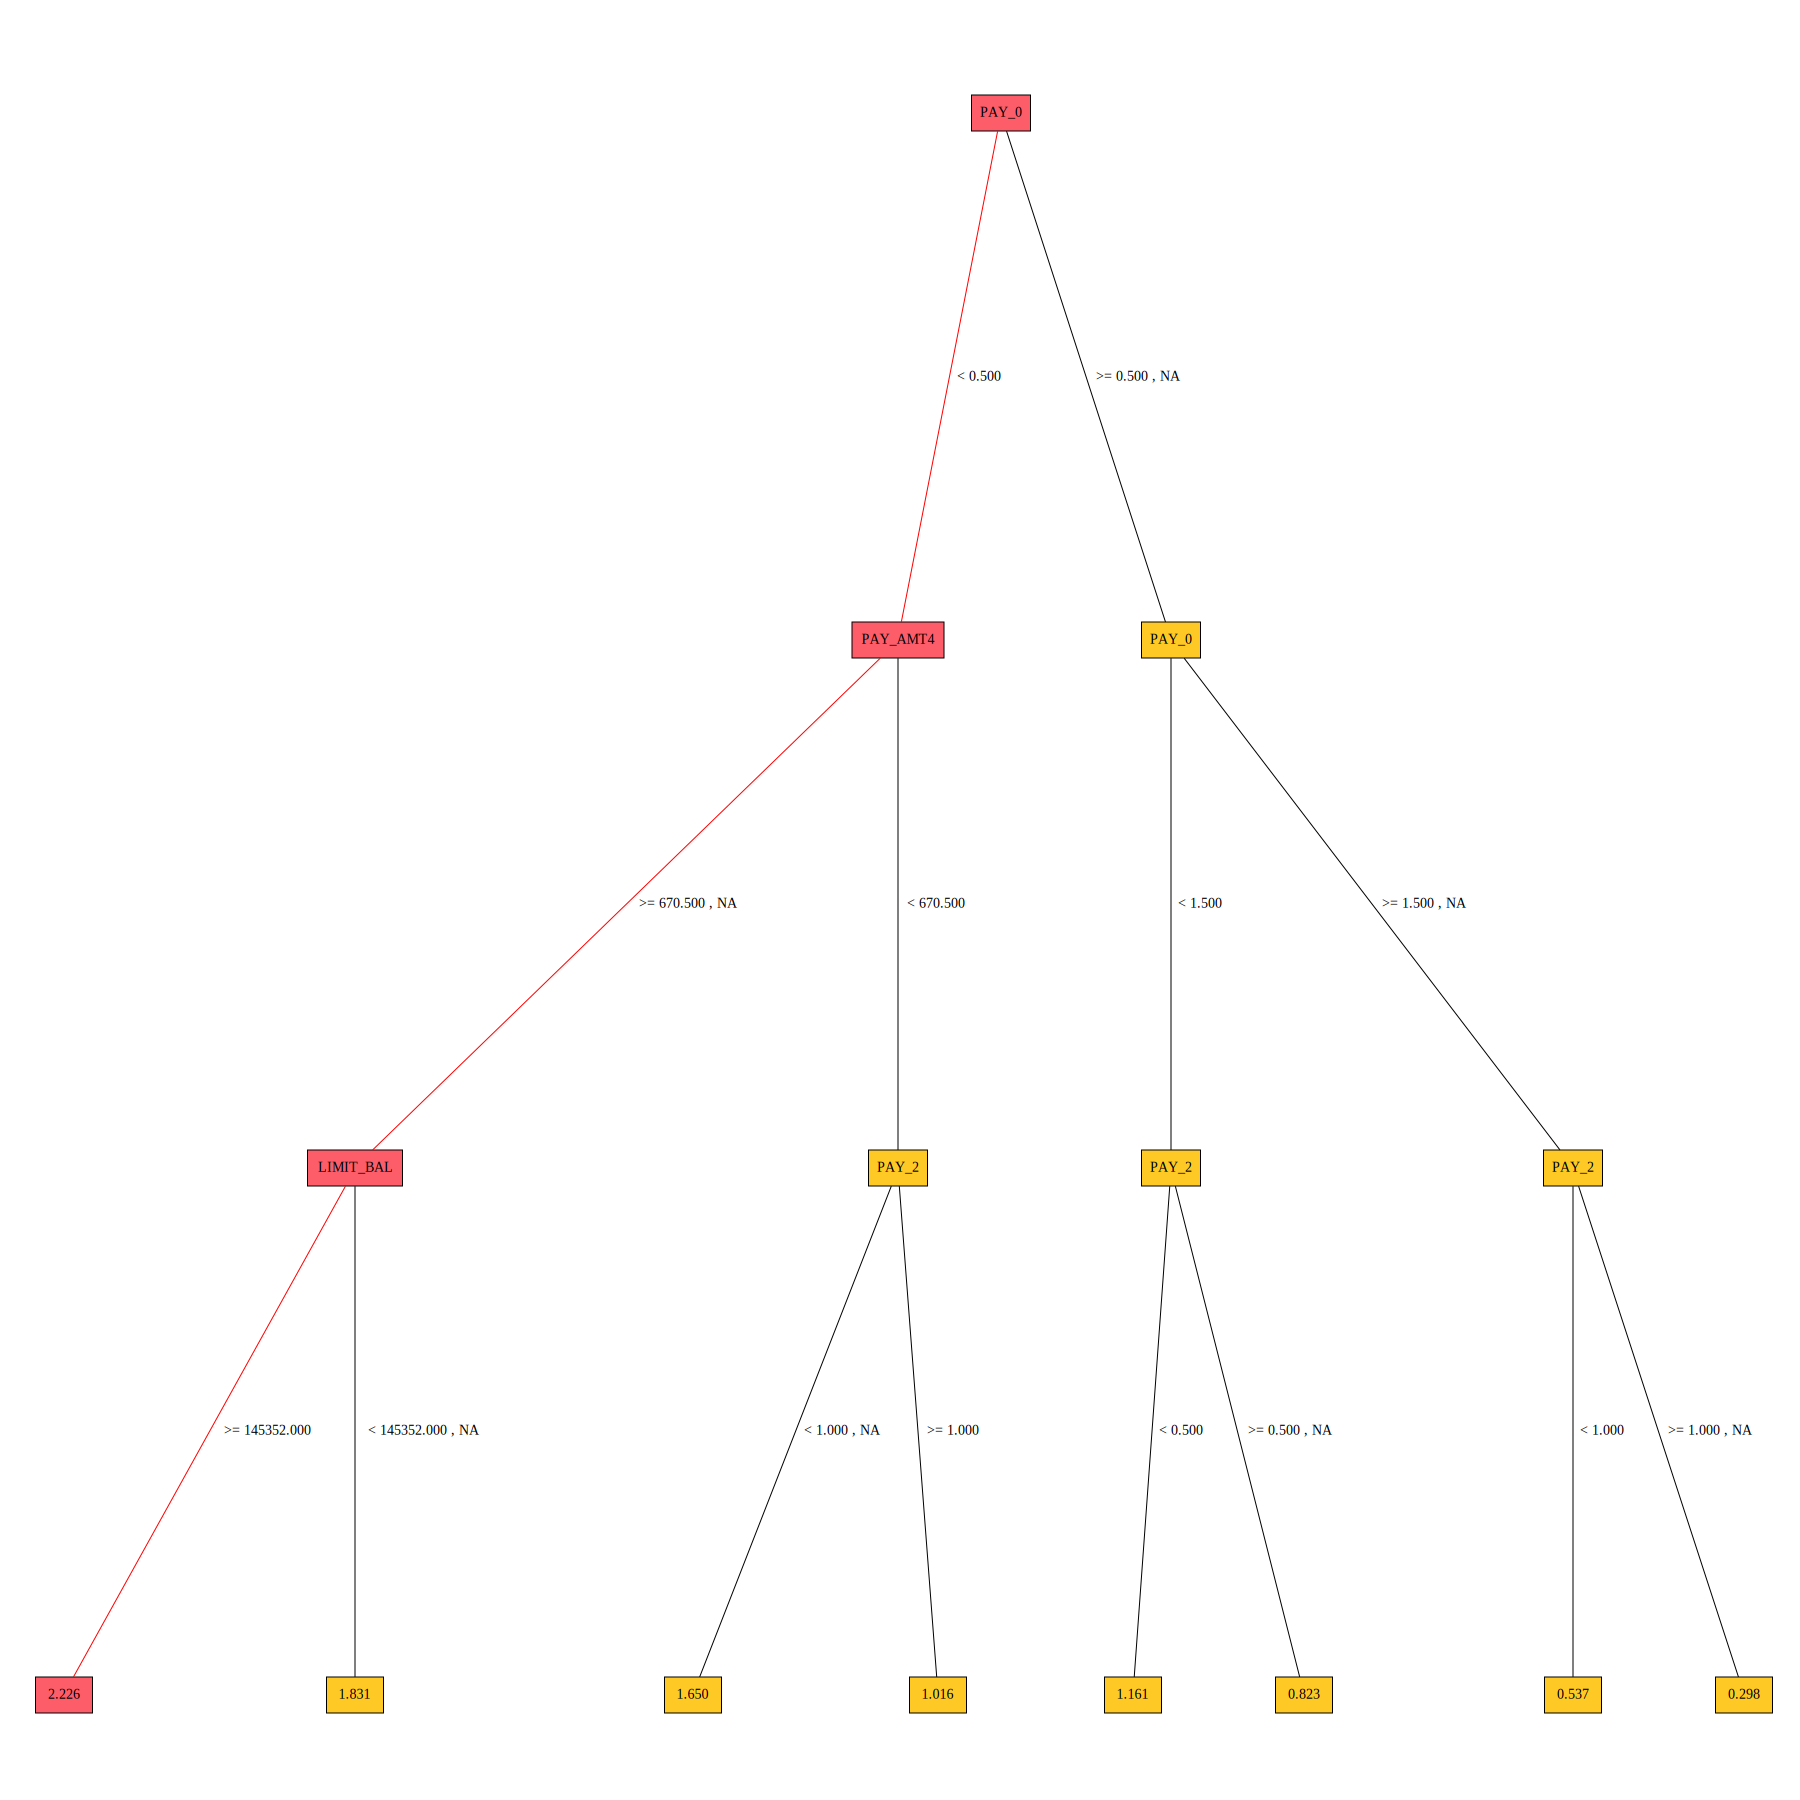

In [11]:
result.plot()

# show plot in a separate view
# result.plot().render(view=True)

### Save the explainer log and data

In [12]:
# save the explainer log
result.log(path="./residual-dt-surrogate-demo.log")

In [13]:
# calculation: regression problem vs. binomial problem
!head residual-dt-surrogate-demo.log

2023-03-12 23:47:12,498 WARNING Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776 setting default residuals debug class...
2023-03-12 23:47:12,498 WARNING Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776 residuals debug class set to '1'
2023-03-12 23:47:12,501 INFO Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776: BEGIN calculation
2023-03-12 23:47:12,501 INFO Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776: dataset (10000, 25) loaded
2023-03-12 23:47:12,501 INFO Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776: sampling down to 0 rows...
2023-03-12 23:47:12,533 INFO Residual Surrogate Decision Tree 00d7c3b0-0982-47e3-ac29-8f0457d330b5/4028f8a8-b307-4d07-8c7c-8fefbc52e776: calculating binomial/regress

In [14]:
# save the explainer data
result.zip(file_path="./residual-dt-surrogate-demo-archive.zip")

In [15]:
!unzip -l residual-dt-surrogate-demo-archive.zip

Archive:  residual-dt-surrogate-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     5690  2023-03-12 23:47   explainer_h2o_sonar_explainers_residual_dt_surrogate_explainer_ResidualDecisionTreeSurrogateExplainer_4028f8a8-b307-4d07-8c7c-8fefbc52e776/result_descriptor.json
     1953  2023-03-12 23:47   explainer_h2o_sonar_explainers_residual_dt_surrogate_explainer_ResidualDecisionTreeSurrogateExplainer_4028f8a8-b307-4d07-8c7c-8fefbc52e776/work/dt-class-0.dot
    60745  2023-03-12 23:47   explainer_h2o_sonar_explainers_residual_dt_surrogate_explainer_ResidualDecisionTreeSurrogateExplainer_4028f8a8-b307-4d07-8c7c-8fefbc52e776/work/dtModel.json
   291881  2023-03-12 23:47   explainer_h2o_sonar_explainers_residual_dt_surrogate_explainer_ResidualDecisionTreeSurrogateExplainer_4028f8a8-b307-4d07-8c7c-8fefbc52e776/work/dtPathsFrame.csv
     8733  2023-03-12 23:47   explainer_h2o_sonar_explainers_residual_dt_surrogate_explainer_ResidualDecisionTreeSurrogate